# Analyse du dataset d'histoire olympique

# Création de la Base de Données et de la Table dans Hive

In [1]:
from pyhive import hive

# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Création d'une base de données   
database_name = "bigdata_athlete"

# Création de la requête SQL pour créer la base de données
create_database_query = f"CREATE DATABASE IF NOT EXISTS {database_name}"

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(create_database_query)

# Fermeture de la connexion
conn.close()

print(f"La base de données {database_name} a été créée avec succès.")

La base de données bigdata_athlete a été créée avec succès.


# Création de la table 

In [2]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Nom de la table
table_name = f"{database_name}.tab3_athlete"

# Création de la requête SQL pour créer la table
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    ID BIGINT,
    Name STRING,
    Sex CHAR(3),
    Age INT,
    Height INT,
    Weight INT,
    Team STRING,
    NOC STRING,
    Games STRING,
    Year INT,
    Season STRING,
    City STRING,
    Sport STRING,
    Event STRING,
    Medal STRING
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/app/master_bigdata/'
TBLPROPERTIES ("skip.header.line.count"="1")
"""

# Exécution de la requête de création de table
with conn.cursor() as cursor:
    cursor.execute(create_table_query)
    
# Fermeture de la connexion
conn.close()
print(f"La table {table_name} a été créée avec succès.")

La table bigdata_athlete.tab3_athlete a été créée avec succès.


In [3]:
import pandas as pd

# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")


# Nom de la table
table_name = f"{database_name}.tab3_athlete"

# Requête Hive pour sélectionner toutes les lignes de la table
select_query = f"SELECT * FROM {table_name}"

# Exécution de la requête SELECT
with conn.cursor() as cursor:
    cursor.execute(select_query)

    # Récupération des résultats dans un DataFrame pandas
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,tab3_athlete.id,tab3_athlete.name,tab3_athlete.sex,tab3_athlete.age,tab3_athlete.height,tab3_athlete.weight,tab3_athlete.team,tab3_athlete.noc,tab3_athlete.games,tab3_athlete.year,tab3_athlete.season,tab3_athlete.city,tab3_athlete.sport,tab3_athlete.event,tab3_athlete.medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,Ski Jumping Men's Large Hill,Individual
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,Ski Jumping Men's Large Hill,Team
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA


# Analyses

## Analyse de la Moyenne du Poids et de la Taille par Sexe

In [4]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sex,
    AVG(Weight) AS AverageWeight,
    COUNT(*) AS Frequency
FROM
    (SELECT Sex, Weight
     FROM {table_name}
     WHERE Sex IN ('F', 'M') AND Weight IS NOT NULL) subquery
GROUP BY Sex
ORDER BY Sex
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sex,averageweight,frequency
0,F,60.040751,65962
1,M,75.712669,140448


In [5]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sex,
    AVG(Height) AS AverageHeight
FROM
    (SELECT Sex, Height
     FROM {table_name}
     WHERE Sex IN ('F', 'M') AND Height IS NOT NULL) subquery
GROUP BY Sex
ORDER BY Sex
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sex,averageheight
0,F,167.845415
1,M,178.835103


## Distribution du Poids et de la Taille  par Sexe

In [10]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT Sex, Weight, COUNT(*) as Frequency
FROM {table_name}
WHERE Sex IN ('F', 'M') AND Weight IS NOT NULL
GROUP BY Sex, Weight
ORDER BY Sex, Weight
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df_Weight = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df_Weight.head(10)

,sex,weight,frequency
0,F,25,6
1,F,28,13
2,F,30,42
3,F,31,23
4,F,32,41
5,F,33,51
6,F,34,73
7,F,35,92
8,F,36,137
9,F,37,170


In [11]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT Sex, Height, COUNT(*) as Frequency
FROM {table_name}
WHERE Sex IN ('F', 'M') AND Height IS NOT NULL
GROUP BY Sex, Height
ORDER BY Sex, Height
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df_Height = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df_Height.head(10)

,sex,height,frequency
0,F,127,6
1,F,131,2
2,F,132,6
3,F,133,5
4,F,135,12
5,F,136,27
6,F,137,15
7,F,138,17
8,F,139,48
9,F,140,53


### La Visualisations de la Distribution du Poids et de la Taille par Sexe

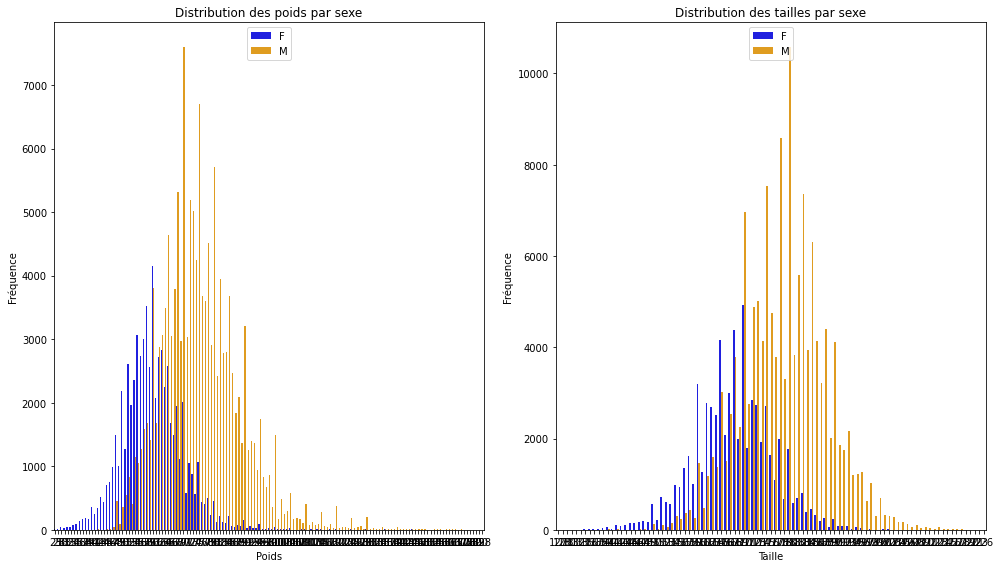

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimer les espaces supplémentaires dans la colonne 'sex'
df_Weight['sex'] = df_Weight['sex'].str.strip()
df_Height['sex'] = df_Height['sex'].str.strip()

# Créer un diagramme en barres empilées avec seaborn pour le poids
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='weight', y='frequency', hue='sex', data=df_Weight, palette={'F': 'blue', 'M': 'orange'})
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.title('Distribution des poids par sexe')
plt.legend()

# Créer un diagramme en barres empilées avec seaborn pour la taille
plt.subplot(1, 2, 2)
sns.barplot(x='height', y='frequency', hue='sex', data=df_Height, palette={'F': 'blue', 'M': 'orange'})
plt.xlabel('Taille')
plt.ylabel('Fréquence')
plt.title('Distribution des tailles par sexe')
plt.legend()

plt.tight_layout()
plt.show()

# Top 10 des Pays avec le Plus Grand Nombre de Médailles

### Les 10 meilleurs pays en termes de vecteur des médailles

In [13]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    COUNT(*) AS TotalMedals
FROM
    {table_name}
WHERE
    Medal IN ('Gold', 'Silver', 'Bronze')
GROUP BY
    Team
ORDER BY
    TotalMedals DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,totalmedals
0,United States,4190
1,Soviet Union,1963
2,Germany,1401
3,Great Britain,1245
4,Australia,1143
5,Canada,1117
6,Italy,966
7,Russia,921
8,Sweden,917
9,France,880


### Voici la visualisation des 10 meilleurs pays en termes de vecteur des médailles 

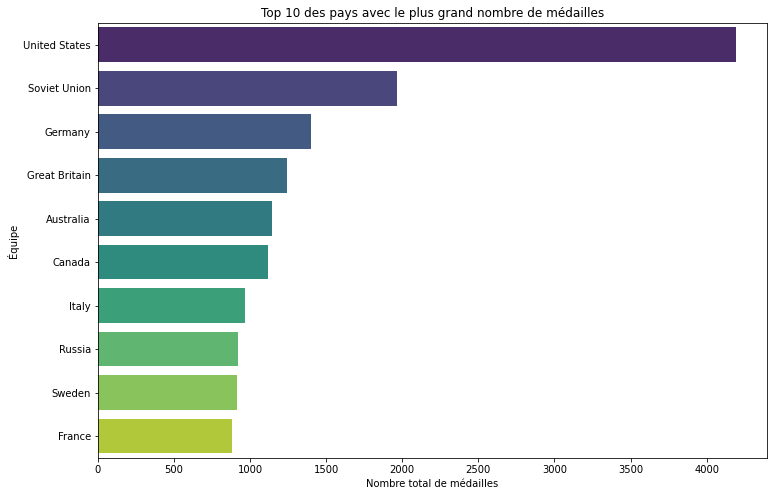

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='totalmedals', y='team', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre total de médailles")
plt.ylabel('Équipe')
plt.title("Top 10 des pays avec le plus grand nombre de médailles")

# Afficher le graphique
plt.show()

## Médailles d'Or

In [15]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    COUNT(*) AS Gold
FROM {table_name}
WHERE Medal = 'Gold'
GROUP BY Team
ORDER BY Gold DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,gold
0,United States,2028
1,Soviet Union,813
2,Germany,430
3,Great Britain,417
4,Canada,401
5,East Germany,318
6,Italy,301
7,Russia,293
8,Australia,286
9,China,271


### Voici la visualisation de TOP 10 des pays ayant remporté le plus de médailles d'or.

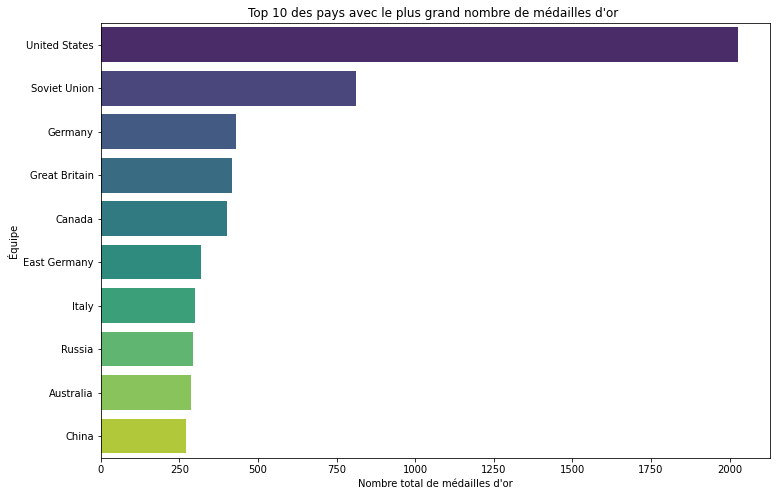

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='gold', y='team', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre total de médailles d'or")
plt.ylabel('Équipe')
plt.title("Top 10 des pays avec le plus grand nombre de médailles d'or ")

# Afficher le graphique
plt.show()

## Médailles d'Argent

In [17]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    COUNT(*) AS Silver
FROM {table_name}
WHERE Medal = 'Silver'
GROUP BY Team
ORDER BY Silver DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,silver
0,United States,1221
1,Soviet Union,584
2,Germany,455
3,Australia,408
4,Great Britain,390
5,Canada,364
6,Sweden,319
7,France,316
8,Italy,311
9,Russia,297


### Voici la visualisation de Top 10 des pays ayant remporté le plus de médailles d'argent.

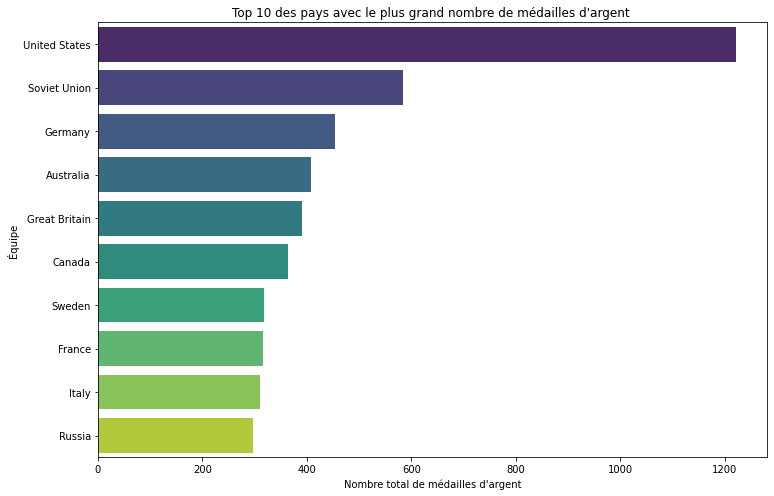

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='silver', y='team', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre total de médailles d'argent")
plt.ylabel('Équipe')
plt.title("Top 10 des pays avec le plus grand nombre de médailles d'argent ")

# Afficher le graphique
plt.show()

## Médailles de Bronze

In [19]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    COUNT(*) AS Bronze
FROM {table_name}
WHERE Medal = 'Bronze'
GROUP BY Team
ORDER BY Bronze DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,bronze
0,United States,941
1,Soviet Union,566
2,Germany,516
3,Australia,449
4,Great Britain,438
5,Sweden,355
6,Italy,354
7,France,353
8,Canada,352
9,Finland,343


### Voici la visualisation de Top 10 des pays ayant remporté le plus de médailles de bronze

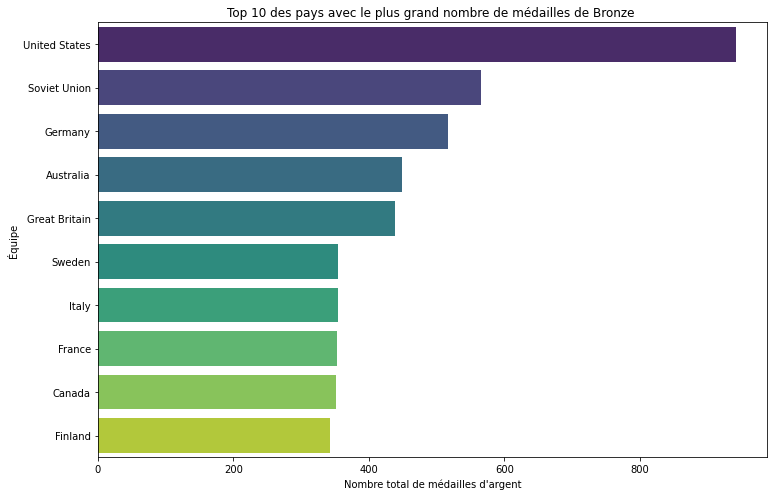

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='bronze', y='team', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre total de médailles d'argent")
plt.ylabel('Équipe')
plt.title("Top 10 des pays avec le plus grand nombre de médailles de Bronze ")


# Afficher le graphique
plt.show()

### Les 10 meilleurs pays en termes de vecteur des médailles(or, argent, bronze).

In [21]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze')
GROUP BY Team
ORDER BY TotalMedals DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,totalmedals,gold,silver,bronze
0,United States,4190,2028,1221,941
1,Soviet Union,1963,813,584,566
2,Germany,1401,430,455,516
3,Great Britain,1245,417,390,438
4,Australia,1143,286,408,449
5,Canada,1117,401,364,352
6,Italy,966,301,311,354
7,Russia,921,293,297,331
8,Sweden,917,243,319,355
9,France,880,211,316,353


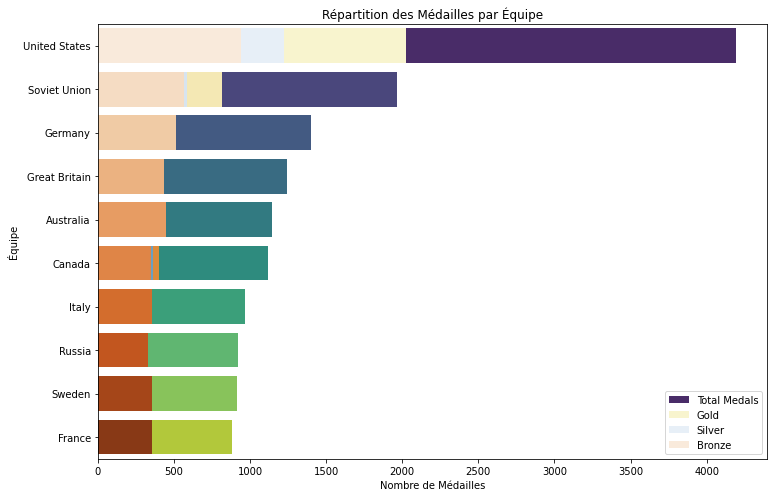

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales empilées
plt.figure(figsize=(12, 8))
sns.barplot(y='team', x='totalmedals', data=df, palette='viridis', label='Total Medals')
sns.barplot(y='team', x='gold', data=df, palette='YlOrBr', label='Gold')
sns.barplot(y='team', x='silver', data=df, palette='Blues', label='Silver')
sns.barplot(y='team', x='bronze', data=df, palette='Oranges', label='Bronze')

# Ajouter des étiquettes et un titre
plt.ylabel('Équipe')
plt.xlabel('Nombre de Médailles')
plt.title('Répartition des Médailles par Équipe')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

### On s'intéresse à présent au nombre de médailles remportées par sexe.

In [23]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sex,
    COUNT(*) AS TotalMedals
FROM
    {table_name}
WHERE
    Medal IN ('Gold', 'Silver', 'Bronze')
GROUP BY
    Sex
ORDER BY
    TotalMedals DESC
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sex,totalmedals
0,M,20989
1,F,9769


### Le Nombre de médailles(or, argent, bronze)remportées par sexe.

In [24]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sex,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze')
GROUP BY Sex
ORDER BY TotalMedals DESC
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sex,totalmedals,gold,silver,bronze
0,M,20989,6986,6909,7094
1,F,9769,3244,3229,3296


### Classement des 10 meilleurs pays masculins en termes de victoires médailles

In [25]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    Sex,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze') AND Sex IN ('M')
GROUP BY Team,Sex
ORDER BY TotalMedals DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,sex,totalmedals,gold,silver,bronze
0,United States,M,2626,1267,750,609
1,Soviet Union,M,1386,563,432,391
2,Great Britain,M,939,337,304,298
3,Germany,M,888,283,298,307
4,Italy,M,818,267,253,298
5,Sweden,M,741,206,241,294
6,France,M,708,173,246,289
7,Canada,M,646,256,228,162
8,Australia,M,631,120,239,272
9,Japan,M,519,144,166,209


## Visualisation du classement masculin.

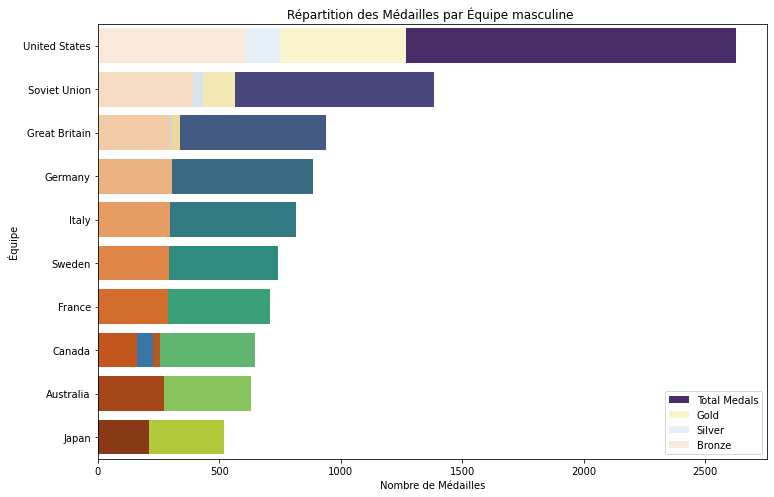

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales empilées
plt.figure(figsize=(12, 8))
sns.barplot(y='team', x='totalmedals', data=df, palette='viridis', label='Total Medals')
sns.barplot(y='team', x='gold', data=df, palette='YlOrBr', label='Gold')
sns.barplot(y='team', x='silver', data=df, palette='Blues', label='Silver')
sns.barplot(y='team', x='bronze', data=df, palette='Oranges', label='Bronze')

# Ajouter des étiquettes et un titre
plt.ylabel('Équipe')
plt.xlabel('Nombre de Médailles')
plt.title('Répartition des Médailles par Équipe masculine ')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

### Classement des 10 meilleurs pays féminins en termes de victoires médailles

In [27]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Team,
    Sex,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze') AND Sex IN ('F')
GROUP BY Team,Sex
ORDER BY TotalMedals DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,team,sex,totalmedals,gold,silver,bronze
0,United States,F,1564,761,471,332
1,Soviet Union,F,577,250,152,175
2,China,F,549,167,219,163
3,Germany,F,513,147,157,209
4,Australia,F,512,166,169,177
5,Russia,F,476,179,161,136
6,Canada,F,471,145,136,190
7,Netherlands,F,378,124,124,130
8,East Germany,F,365,156,115,94
9,Great Britain,F,306,80,86,140


## Visualisation du classement féminin

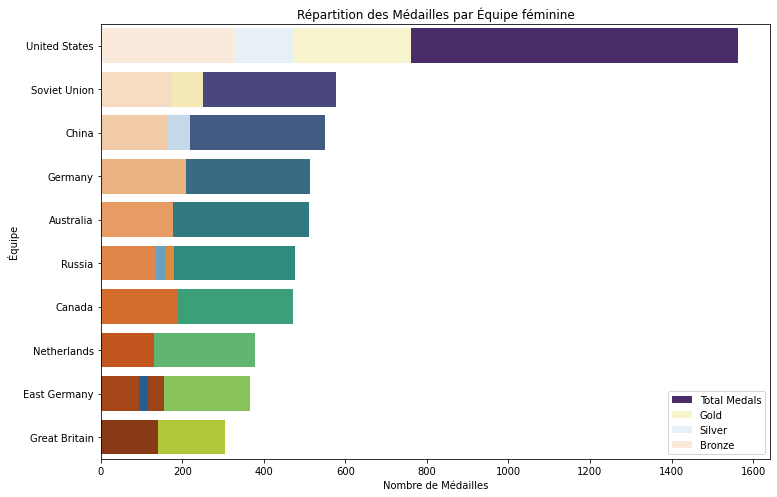

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales empilées
plt.figure(figsize=(12, 8))
sns.barplot(y='team', x='totalmedals', data=df, palette='viridis', label='Total Medals')
sns.barplot(y='team', x='gold', data=df, palette='YlOrBr', label='Gold')
sns.barplot(y='team', x='silver', data=df, palette='Blues', label='Silver')
sns.barplot(y='team', x='bronze', data=df, palette='Oranges', label='Bronze')

# Ajouter des étiquettes et un titre
plt.ylabel('Équipe')
plt.xlabel('Nombre de Médailles')
plt.title('Répartition des Médailles par Équipe féminine')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

### Les 10 sports les plus présents aux Jeux Olympiques

In [29]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sport,
    COUNT(DISTINCT ID) AS NombreParticipants
FROM
    {table_name}
GROUP BY Sport
ORDER BY NombreParticipants DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sport,nombreparticipants
0,Athletics,21790
1,Swimming,8644
2,Rowing,7558
3,Football,6146
4,Cycling,5800
5,Boxing,5231
6,Wrestling,4956
7,Shooting,4828
8,Sailing,4396
9,Gymnastics,4093


#### Visualisation des Sport les plus présents aux Jeux Olympiques

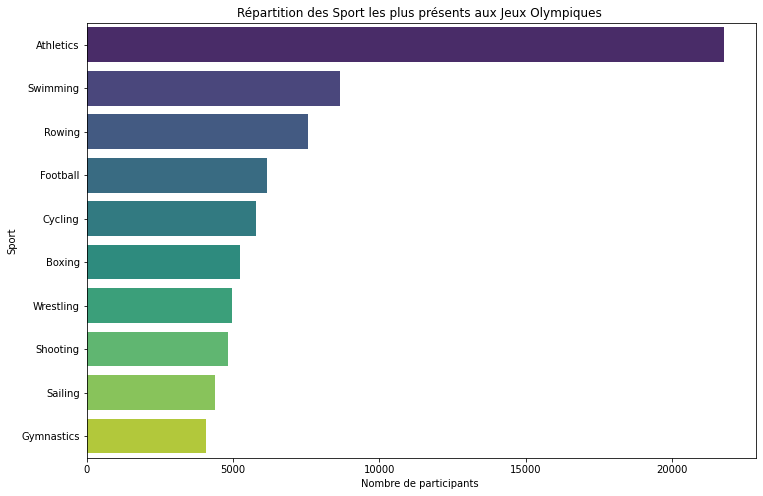

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='nombreparticipants', y='sport', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre de participants ")
plt.ylabel('Sport')
plt.title("Répartition des Sport les plus présents aux Jeux Olympiques ")

# Afficher le graphique
plt.show()

### On s'intéresse à présent au nombre de médailles remportées par sports .

In [31]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Sport,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze') 
GROUP BY Sport
ORDER BY TotalMedals DESC
LIMIT 10
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,sport,totalmedals,gold,silver,bronze
0,Athletics,3493,1149,1178,1166
1,Rowing,2828,923,944,961
2,Swimming,2785,973,918,894
3,Gymnastics,1915,659,629,627
4,Football,1566,513,511,542
5,Hockey,1518,512,498,508
6,Ice Hockey,1504,505,501,498
7,Sailing,1194,430,405,359
8,Basketball,1058,350,359,349
9,Handball,1057,348,357,352


### Visualisation du classement par sport

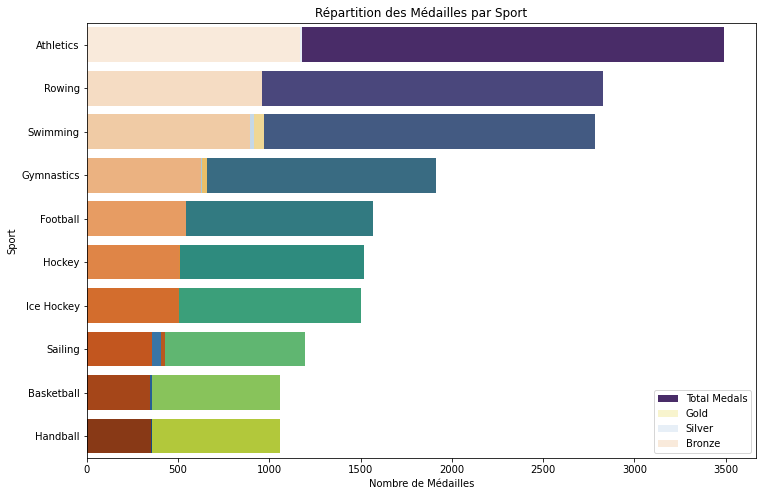

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique à barres horizontales empilées
plt.figure(figsize=(12, 8))
sns.barplot(y='sport', x='totalmedals', data=df, palette='viridis', label='Total Medals')
sns.barplot(y='sport', x='gold', data=df, palette='YlOrBr', label='Gold')
sns.barplot(y='sport', x='silver', data=df, palette='Blues', label='Silver')
sns.barplot(y='sport', x='bronze', data=df, palette='Oranges', label='Bronze')

# Ajouter des étiquettes et un titre
plt.ylabel('Sport')
plt.xlabel('Nombre de Médailles')
plt.title('Répartition des Médailles par Sport')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

### On s'intéresse à présent au nombre de participation pour chaque année aux Jeux olympiques

In [34]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Year,
    COUNT(DISTINCT ID) AS NombreParticipants
FROM
    {table_name}
WHERE Year IS NOT NULL AND ID IS NOT NULL    
GROUP BY Year
ORDER BY Year DESC, NombreParticipants DESC
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,year,nombreparticipants
0,2016,11163
1,2014,2741
2,2012,10490
3,2010,2528
4,2008,10869
5,2006,2487
6,2004,10526
7,2002,2389
8,2000,10599
9,1998,2169


### Visualisation de l'évolution du nombre de participants au fil du temps

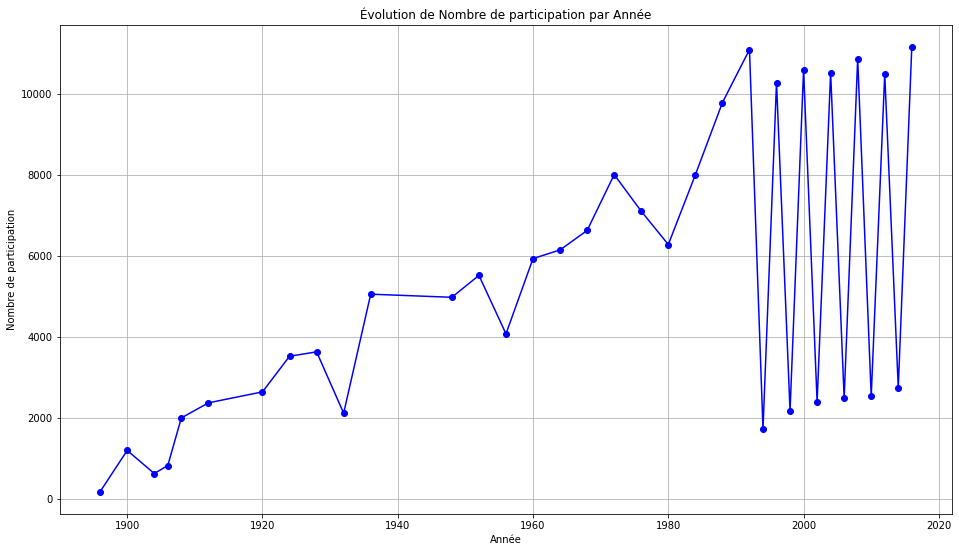

In [35]:
import matplotlib.pyplot as plt


years = df['year'].values
total_medals = df['nombreparticipants'].values

# Création du graphique en ligne
plt.figure(figsize=(16, 9))
plt.plot(years, total_medals, label='Nombre de participation', marker='o', color='blue')

# Ajout des étiquettes et titres
plt.xlabel('Année')
plt.ylabel('Nombre de participation')
plt.title('Évolution de Nombre de participation par Année')

# Affichage du graphique
plt.grid(True)
plt.show()


### On s'intéresse à présent au nombre de médailles remportées par année aux Jeux olympiques.

In [36]:
# Connexion à Hive
conn = hive.Connection(host="projet-biddata-m", port=10000, username="berkani_yacine")

# Requête Hive
hive_query = f"""
SELECT
    Year,
    COUNT(*) AS TotalMedals,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
FROM {table_name}
WHERE Medal IN ('Gold', 'Silver', 'Bronze') 
GROUP BY Year
ORDER BY Year DESC, TotalMedals DESC
"""

# Exécution de la requête
with conn.cursor() as cursor:
    cursor.execute(hive_query)

    # Récupération des résultats
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Fermeture de la connexion
conn.close()

# Affichage du DataFrame
df

,year,totalmedals,gold,silver,bronze
0,2016,1686,557,549,580
1,2014,556,188,184,184
2,2012,1598,521,521,556
3,2010,476,160,158,158
4,2008,1694,553,555,586
5,2006,496,166,165,165
6,2004,1660,547,549,564
7,2002,445,151,146,148
8,2000,1669,547,552,570
9,1998,415,136,137,142


### Visualisation de l'évolution temporelle du nombre total de médailles

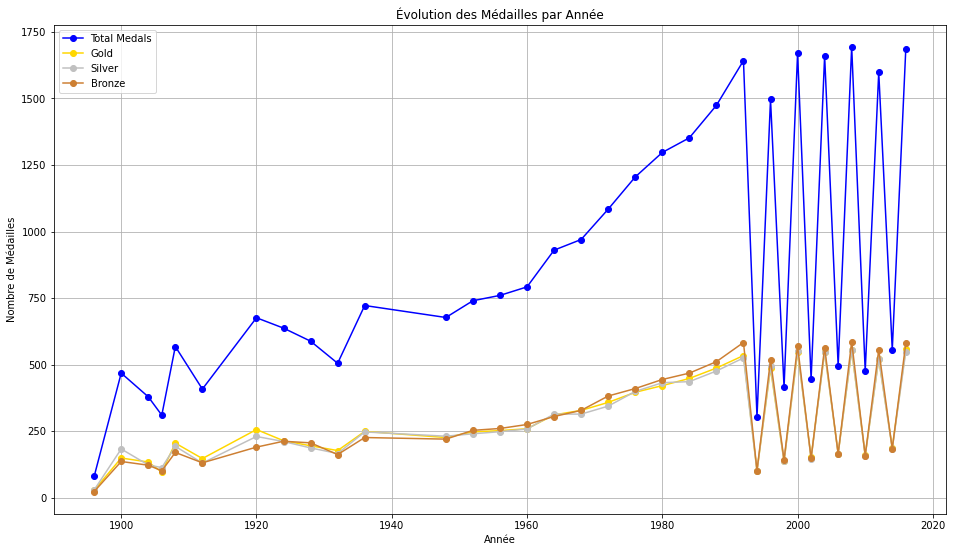

In [37]:
import matplotlib.pyplot as plt


years = df['year'].values
total_medals = df['totalmedals'].values
gold = df['gold'].values
silver = df['silver'].values
bronze = df['bronze'].values

# Création du graphique en ligne
plt.figure(figsize=(16, 9))
plt.plot(years, total_medals, label='Total Medals', marker='o', color='blue')
plt.plot(years, gold, label='Gold', marker='o', color='gold')
plt.plot(years, silver, label='Silver', marker='o', color='silver')
plt.plot(years, bronze, label='Bronze', marker='o', color='#cd7f32')

# Ajout des étiquettes et titres
plt.xlabel('Année')
plt.ylabel('Nombre de Médailles')
plt.title('Évolution des Médailles par Année')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()